In [1]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
df=pd.read_csv(r"C:\Users\apltk\Downloads\archive (8)\SOCR-HeightWeight.csv")
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [15]:
df=df.drop(columns='Index')

In [17]:
X = df[['Weight(Pounds)']]  # Двойные квадратные скобки для выбора DataFrame
y = df['Height(Inches)']


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [19]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 1), (7500, 1), (17500,), (7500,))

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
print(y_train.shape)

(17500,)


In [22]:
print(len(y_train))

17500


In [23]:
df.head(5)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [24]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.intercept_

57.56057069601193

In [26]:
model.coef_

array([0.08198199])

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([67.64465832, 67.61725994, 67.15383216, ..., 68.15912807,
       68.87286324, 68.07529329])

In [29]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [30]:
mean_absolute_error(y_test,y_pred)

1.3335968600260153

In [31]:
mean_absolute_percentage_error(y_test,y_pred)

0.019626399483217642

In [32]:
mean_squared_error(y_test,y_pred)

2.7881761877477365

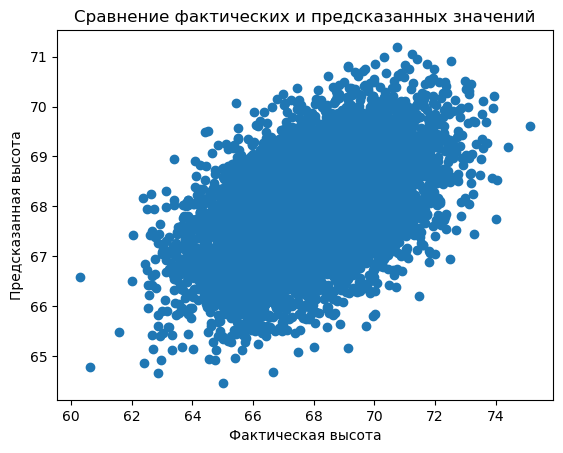

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Фактическая высота')
plt.ylabel('Предсказанная высота')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()

C:\Users\apltk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


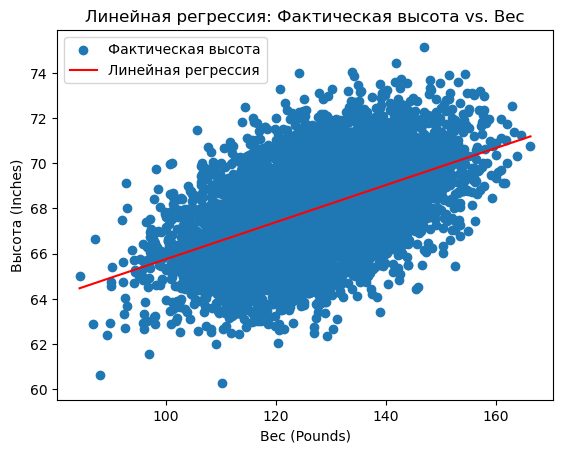

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Создание точек для построения линии регрессии
x_line = np.linspace(min(X_test.values), max(X_test.values), 1000).reshape(-1, 1)
y_line = model.predict(x_line)

# Визуализация точек
plt.scatter(X_test, y_test, label='Фактическая высота')

# Визуализация линии регрессии
plt.plot(x_line, y_line, color='red', label='Линейная регрессия')

# Добавление подписей и заголовка
plt.xlabel('Вес (Pounds)')
plt.ylabel('Высота (Inches)')
plt.title('Линейная регрессия: Фактическая высота vs. Вес')
plt.legend()

# Показать график
plt.show()


In [43]:
# Предсказать высоту для конкретного веса (например, 150 фунтов) с именами признаков
weight_to_predict = np.array([[176.37]])  # Обратите внимание на двойные скобки
weight_to_predict_df = pd.DataFrame(weight_to_predict, columns=['Weight(Pounds)'])  # Задайте имена признаков
predicted_height = model.predict(weight_to_predict_df)

print(f"Предсказанная высота для веса 176.37 фунтов: {predicted_height[0]:.2f} дюймов")


Предсказанная высота для веса 176.37 фунтов: 72.02 дюймов


In [40]:
# Предсказать вес для конкретной высоты (например, 65 дюймов)
height_to_predict = 65
predicted_weight = (height_to_predict - model.intercept_) / model.coef_

print(f"Предсказанный вес для высоты 65 дюймов: {predicted_weight[0]:.2f} фунтов")


Предсказанный вес для высоты 65 дюймов: 90.74 фунтов


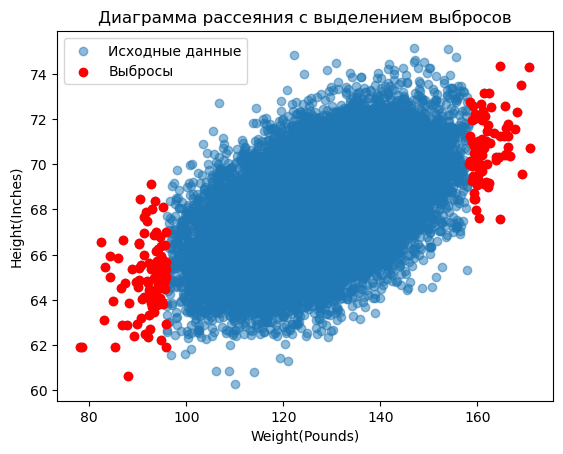

In [44]:
 feature_name = 'Weight(Pounds)'
target_name = 'Height(Inches)'
 
 
    #Построение диаграммы рассеяния
plt.scatter(df[feature_name], df[target_name], alpha=0.5, label='Исходные данные')

# Определение границ для выбросов (пример для межквартильного размаха)
Q1 = df[feature_name].quantile(0.25)
Q3 = df[feature_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выделение выбросов
outliers = df[(df[feature_name] < lower_bound) | (df[feature_name] > upper_bound)]
plt.scatter(outliers[feature_name], outliers[target_name], color='red', label='Выбросы')

# Настройка графика
plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.title('Диаграмма рассеяния с выделением выбросов')
plt.legend()
plt.show()

In [45]:
# Вывести статистику для выбросов
outliers_stats = df[df[feature_name].isin(outliers[feature_name])]
print("Статистика для выбросов:")
print(outliers_stats.describe())

# Вывести общую статистику
print("\nОбщая статистика:")
print(df[feature_name].describe())

Статистика для выбросов:
       Height(Inches)  Weight(Pounds)
count      191.000000      191.000000
mean        67.508219      123.059614
std          3.259564       34.995602
min         60.612650       78.014760
25%         64.835320       92.735745
50%         66.951700       95.638140
75%         70.418625      160.459900
max         74.363280      170.924000

Общая статистика:
count    25000.000000
mean       127.079421
std         11.660898
min         78.014760
25%        119.308675
50%        127.157750
75%        134.892850
max        170.924000
Name: Weight(Pounds), dtype: float64


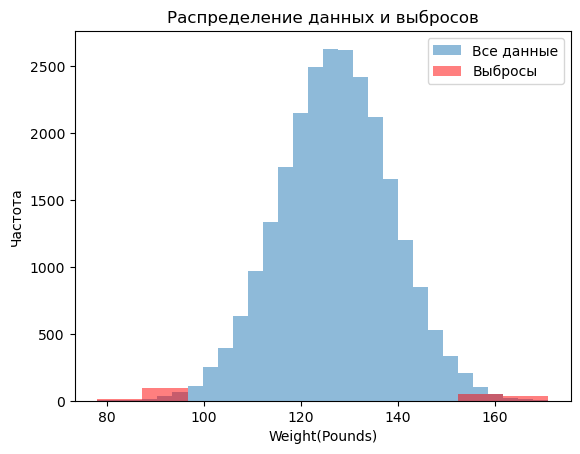

In [46]:
# Построить гистограммы для выбросов и всего набора данных
plt.hist(df[feature_name], bins=30, alpha=0.5, label='Все данные')
plt.hist(outliers[feature_name], bins=10, alpha=0.5, label='Выбросы', color='red')
plt.xlabel(feature_name)
plt.ylabel('Частота')
plt.title('Распределение данных и выбросов')
plt.legend()
plt.show()

In [47]:
print("Значения выбросов:")
print(outliers[feature_name])

Значения выбросов:
156      158.95620
249       84.35980
293       92.74955
367      168.22900
446      162.41090
           ...    
24187    161.85040
24610     82.38298
24750    159.63440
24835     94.40946
24889    161.85320
Name: Weight(Pounds), Length: 191, dtype: float64


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Замените 'your_data.csv', 'feature', 'target' на соответствующие значения

# Исключение выбросов
Q1 = df[feature_name].quantile(0.25)
Q3 = df[feature_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_df = df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]

# Разделение на обучающий и тестовый наборы данных
X = cleaned_df[[feature_name]]
y = cleaned_df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка производительности модели на тестовом наборе данных
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка на тестовом наборе данных: {mse}")


Среднеквадратичная ошибка на тестовом наборе данных: 2.6918225950403887


In [50]:
# Предсказать высоту для конкретного веса (например, 150 фунтов) с именами признаков
# weight_to_predict - массив с весом для предсказания
weight_to_predict = np.array([[176.37]])  # Обратите внимание на двойные скобки

# Преобразование в DataFrame с заданными именами признаков
weight_to_predict_df = pd.DataFrame(weight_to_predict, columns=['Weight(Pounds)'])

# Предсказание высоты с использованием новой модели
predicted_height = model.predict(weight_to_predict_df)

# Вывод предсказанной высоты
print(f"Предсказанная высота для веса 176.37 фунтов: {predicted_height[0]:.2f} дюймов")

Предсказанная высота для веса 176.37 фунтов: 71.98 дюймов


MSE до преобразования: 2.69
MSE после логарифмирования: 2.70


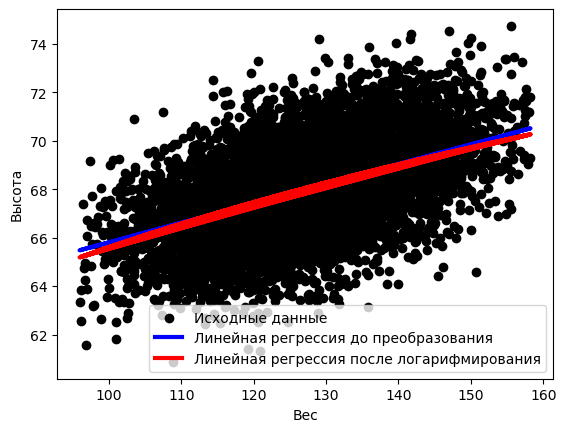

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Создание искусственных данных для примера
np.random.seed(42)
X = cleaned_df[[feature_name]]
y = cleaned_df[target_name]


# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Расчет MSE до преобразования
mse_before = mean_squared_error(y_test, y_pred)
print(f"MSE до преобразования: {mse_before:.2f}")

# Преобразование данных логарифмированием
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

# Обучение модели на преобразованных данных
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)

# Предсказание на преобразованных тестовых данных
y_pred_log = model_log.predict(X_test_log)

# Расчет MSE после логарифмирования
mse_after = mean_squared_error(y_test, y_pred_log)
print(f"MSE после логарифмирования: {mse_after:.2f}")

# Визуализация данных и регрессионных прямых
plt.scatter(X_test, y_test, color='black', label='Исходные данные')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Линейная регрессия до преобразования')
plt.plot(X_test, y_pred_log, color='red', linewidth=3, label='Линейная регрессия после логарифмирования')

plt.xlabel('Вес')
plt.ylabel('Высота')
plt.legend()
plt.show()


MSE для полиномиальной регрессии: 2.69


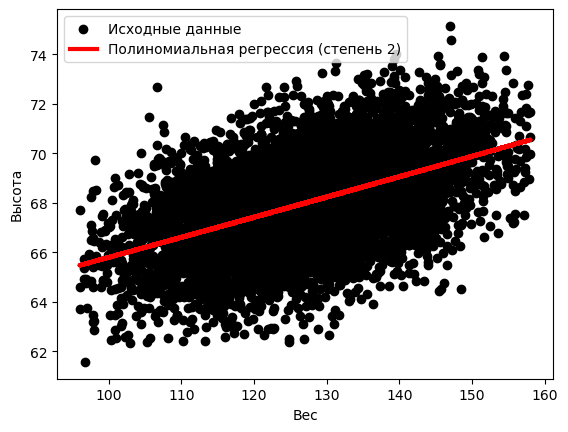

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание искусственных данных для примера
X = cleaned_df[[feature_name]]
y = cleaned_df[target_name]

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Преобразование признаков в полиномиальные
degree = 2  # степень полинома
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение линейной регрессии на полиномиальных признаках
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Предсказание на тестовых данных
y_pred_poly = model_poly.predict(X_test_poly)

# Расчет MSE для полиномиальной регрессии
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"MSE для полиномиальной регрессии: {mse_poly:.2f}")

# Визуализация данных и полиномиальной регрессии
plt.scatter(X_test, y_test, color='black', label='Исходные данные')
plt.plot(X_test, y_pred_poly, color='red', linewidth=3, label=f'Полиномиальная регрессия (степень {degree})')

plt.xlabel('Вес')
plt.ylabel('Высота')
plt.legend()
plt.show()


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание искусственных данных для примера
X = cleaned_df[[feature_name]]
y = cleaned_df[target_name]

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание нового признака - индекса массы тела (BMI)
height_in_meters = 1.75  # пример значения роста в метрах
X_train_bmi = np.concatenate([X_train, X_train / (height_in_meters ** 2)], axis=1)
X_test_bmi = np.concatenate([X_test, X_test / (height_in_meters ** 2)], axis=1)

# Обучение линейной регрессии на данных с новым признаком
model_bmi = LinearRegression()
model_bmi.fit(X_train_bmi, y_train)

# Предсказание на тестовых данных
y_pred_bmi = model_bmi.predict(X_test_bmi)

# Расчет MSE с использованием нового признака
mse_bmi = mean_squared_error(y_test, y_pred_bmi)
print(f"MSE с использованием признака BMI: {mse_bmi:.2f}")


MSE с использованием признака BMI: 2.70
